In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
import pix2pix_128
import time
import cv2
import matplotlib.pyplot as plt

2022-11-14 00:59:05.172639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 00:59:05.456403: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 00:59:06.254508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/notoboto/miniconda3/envs/tf/lib/
2022-11-14 00:59:06.254572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plu

In [2]:
dataset, metadata = tfds.load('cycle_gan/horse2zebra', with_info=True, as_supervised=True)

train_horses, train_zebras = dataset['trainA'], dataset['trainB']
test_horses, test_zebras = dataset['testA'], dataset['testB']

2022-11-14 00:59:08.184641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 00:59:08.190086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 00:59:08.190224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 00:59:08.190630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
CHANNELS = 3
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 128
IMG_HEIGHT = 128

In [4]:

# 128x128 input version
generator_g = pix2pix_128.generator(norm_type='instancenorm')
generator_f = pix2pix_128.generator(norm_type='instancenorm')

discriminator_x = pix2pix_128.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix_128.discriminator(norm_type='instancenorm', target=False)

# 256x256 input version
# generator_g = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')
# generator_f = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')

# discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
# discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [5]:
from cyclegan import Cyclegan
from preprocess import Preprocess

In [6]:
cyclegan = Cyclegan(
    generator_g, 
    generator_f, 
    discriminator_x, 
    discriminator_y
)

In [7]:
preprocess = Preprocess(resolution = [IMG_WIDTH, IMG_HEIGHT])

train_horses, train_zebras, test_horses, test_zebras = preprocess.preprocess_all(
    train_horses, 
    train_zebras, 
    test_a = test_horses,
    test_b = test_zebras
)

2022-11-14 00:59:10.604077: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-11-14 00:59:10.604269: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-11-14 00:59:10.995421: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. I

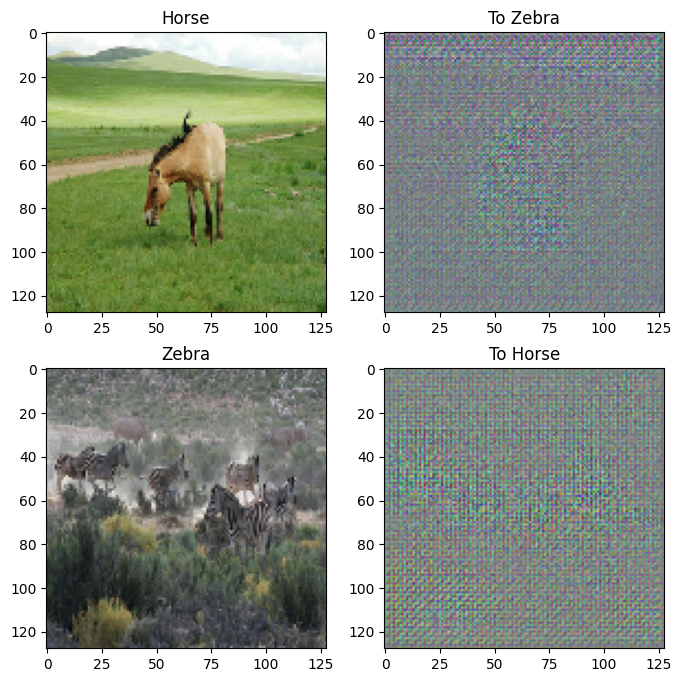

In [8]:
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

def show_result():
    to_zebra = generator_f(sample_horse)
    to_horse = generator_g(sample_zebra)
    plt.figure(figsize=(8, 8))
    contrast = 8

    imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
    title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

    for i in range(len(imgs)):
        plt.subplot(2, 2, i+1)
        plt.title(title[i])
        if i % 2 == 0:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
        else:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
    plt.show()
    
show_result()

In [9]:
cyclegan.train_n_epochs(train_horses, train_zebras, 6)

Start training for 6 epochs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [24:30<00:00, 245.06s/it]


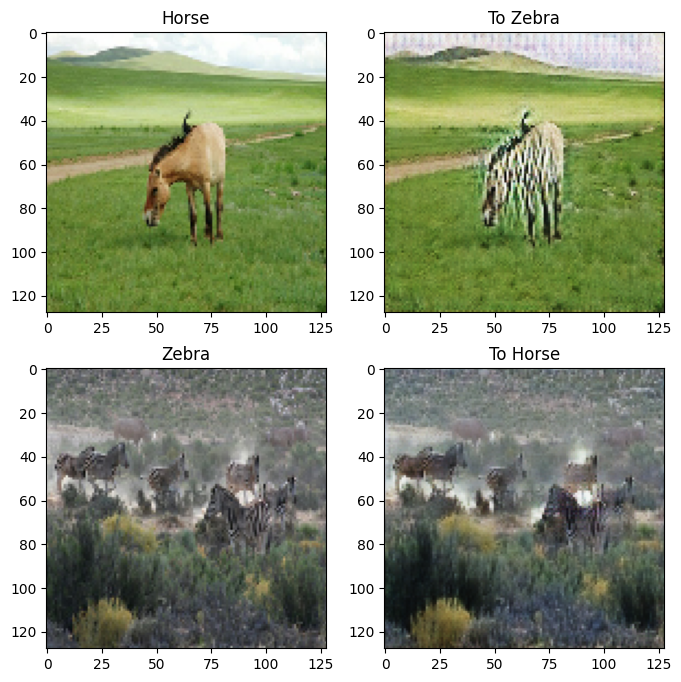

In [10]:
show_result()

In [11]:
cyclegan.train_n_epochs(train_horses, train_zebras, 6)

Start training for 6 epochs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [24:49<00:00, 248.24s/it]


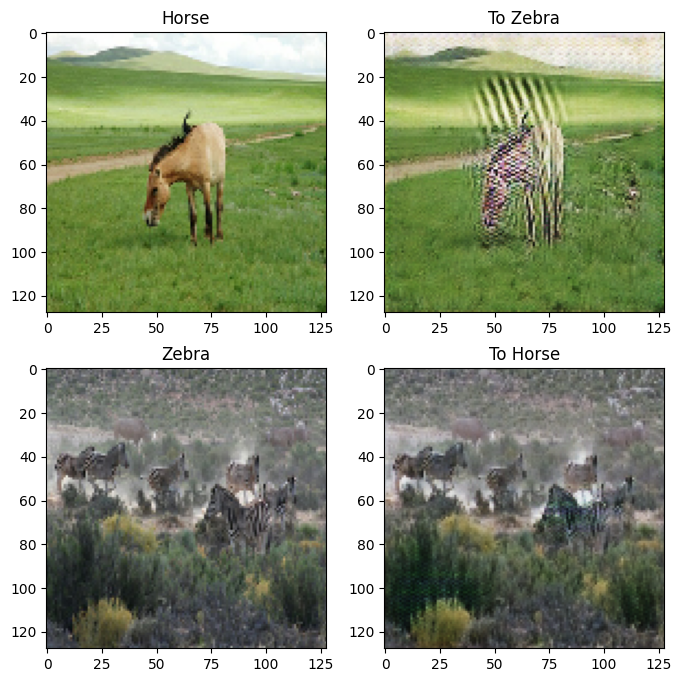

In [12]:
show_result()

In [14]:
cyclegan.checkpoint_saver()

checkpoint saved in ./checkpoints/train
